# Alura Chalenge
## Churn de Clientes

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home" background-color="1297F5">Índice</h3>

* [1. Bibliotecas](#1)<br>
* [2. Lendo os dados](#2)
* [3. Exploratory Data Analysis](#3)

<a id="1"></a>
<font color="#31A1F0" size=+2.5><b>1. Bibliotecas</b></font>

In [1]:
# Bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

# Visualização de dados
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

# Utilidades
from funcoes_data_viz import *
from funcoes_texto import *

In [2]:
# Numero maximo de colunas visiveis ajustado para 50
pd.set_option('display.max_columns', 50)

<a id="2"></a>
<font color="#31A1F0" size=+2.5><b>2. Lendo os Dados</b></font>

A base de dados se encontra no github, logo precisaremos importar essa base para analisar as informaçoes apresentadas.
Para fins de tempo e agilidade no processo, a base de dados foi baixada.

Dataset: https://github.com/sthemonica/alura-voz/blob/main/Dados/Telco-Customer-Churn.json

In [3]:
# Nome do arquivo baixado
json_file = 'Telco-Customer-Churn.json'

In [4]:
df_file = pd.read_json(json_file)

In [5]:
# Verificando as primeiras linhas
df_file.head(2)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


A base de dados esta em um arquivo .json, logo é perfeitamente possível que hajam n dicionarios em cada coluna, ou mesmo estrurua de n dicionarios encadeados. A seguir utilizaremos uma função do pandas para verificar como esses dados são por dentro.

In [6]:
pd.json_normalize(df_file["customer"]).head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4


É possível perceber que cada coluna com  dicionarios possui outras colunas encadeadas em formado .json, sabendo disso captaremos cada dado referente a essas estruturas e depois faremos uma concatenação com o dataframe original e logo após iremos analisar os dados com maior profundidade

In [7]:
# Gerando dataframes de auxilio
df_customer = pd.json_normalize(df_file["customer"])
df_phone = pd.json_normalize(df_file["phone"])
df_internet = pd.json_normalize(df_file["internet"])
df_account = pd.json_normalize(df_file["account"])

In [8]:
# Printando o shape de cada dataframe
print(df_file.shape)
print(df_customer.shape)
print(df_phone.shape)
print(df_internet.shape)
print(df_account.shape)

(7267, 6)
(7267, 5)
(7267, 2)
(7267, 7)
(7267, 5)


In [9]:
# Criando um novo dataframe com os dados
pdList = [df_file[["customerID", "Churn"]], df_customer, df_phone, df_internet, df_account] 
df_spams = pd.concat(pdList, axis=1)

Agora temos o dataframe no qual faremos as futuras analises e posterior aplicação do modelo de Machine Learning

In [10]:
df_spams.sample(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
2912,4043-MKDTV,No,Male,0,Yes,No,71,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,105.25,7291.75
6602,9076-AXYIK,No,Male,1,Yes,No,64,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,No,Electronic check,102.10,6538.45
5504,7547-EKNFS,Yes,Male,0,Yes,No,42,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),95.25,3959.35


<a id="3"></a>
<font color="#31A1F0" size=+2.5><b>3. Exploratory Data Analysis</b></font>

Por fim chegamos a parte mais longa e determinante do processo envolvendo dados, analisá-lo. Aqui faremos algumas análise afim de localizar certas informaçoes.

<a id="3.1"></a>
<font color="#FF7F50" size=+2.0><b>3.1 Dicionário de dados</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Retornar ao Indice</a>

| Característica  | Descrição  |
|---|---|
| customerID  | número de identificação único de cada cliente  |
| Churn  | se o cliente deixou ou não a empresa  |
| gender  | gênero (masculino e feminino)  |
| SeniorCitizen  | informação sobre um cliente ter ou não idade igual ou maior que 65 anos  |
| Partner  | se o cliente possui ou não um parceiro ou parceira  |
| Dependents  | se o cliente possui ou não dependentes  |
| tenure  | meses de contrato do cliente  |
| PhoneService  | assinatura de serviço telefônico  |
| MultipleLines  | assisnatura de mais de uma linha de telefone  |
| InternetService  | assinatura de um provedor internet  |
| OnlineSecurity  | assinatura adicional de segurança online  |
| OnlineBackup  | assinatura adicional de backup online  |
| DeviceProtection  | assinatura adicional de proteção no dispositivo  |
| TechSupport  | assinatura adicional de suporte técnico, menos tempo de espera  |
| StreamingTV  | assinatura de TV a cabo  |
| StreamingMovies  | assinatura de streaming de filmes  |
| Contract  | tipo de contrato  |
| PaperlessBilling  | se o cliente prefere receber online a fatura  |
| PaymentMethod  | forma de pagamento  |
| Charges.Monthly  | total de todos os serviços do cliente por mês  |
| Charges.Total  | total gasto pelo cliente  |


<a id="3.2"></a>
<font color="#FF7F50" size=+2.0><b>3.2 Verificando a estrutura</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Retornar ao Indice</a>

In [11]:
# Analisando quais as caracteristicas de cada observacao
df_spams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


A coluna <b>Charges.Total</b> foi identificada como String, o que não faz sentido dado que o próprio dicionário menciona que ela é uma coluna numérica. É preciso fazer um casting dessa coluna para Numérico, considerando haver texto nessa coluna

In [12]:
# Aplicar um regex para substituir o que não for numerico por nada
df_spams['Charges.Total'] = pd.to_numeric(df_spams['Charges.Total'].str.replace(r'[^\d%]',''))

<a id="3.3"></a>
<font color="#FF7F50" size=+2.0><b>3.3 Valores nulos e duplicados</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Retornar ao Indice</a>

Verificar se há ids de clientes duplicados

In [13]:
# Verificar se há valores duplicados
df_spams[df_spams['customerID'].duplicated()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total


Não há registros de dados duplicados por cliente, agora iremos verificar os dados nulos

In [14]:
# Valores Nulos
df_spams.isnull().sum()

customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
dtype: int64

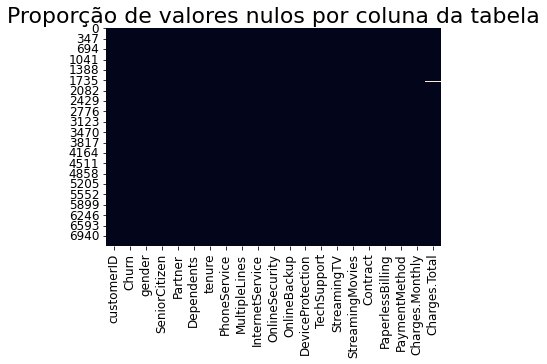

In [15]:
## Plotando os dados
ax = sns.heatmap(df_spams.isnull(), cbar=False)

## Configuração das fontes dos ticks
ax.tick_params(axis = 'both',
               which = 'major',
               labelsize = 12)

## Titulo
plt.title('Proporção de valores nulos por coluna da tabela', 
          fontsize = 22)

## Exibir
plt.show()

Tanto a plotagem quanto as funções do pandas nos mostram haver valores nulos, necessario verificar esses dados nulos

In [16]:
# Verificar os valroes nulos
df_spams[df_spams["Charges.Total"].isnull()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


O campo __Charges.Total__ esta sem dados, porém o campo os campos __Charges.Monthly__ e __tenure__ possuem dados, logo podemos assumir para esse campo o produto desses campos, caso __tenure__ seja maior que zero 

In [17]:
# Todos esses clientes possuem menos de 1 mes de uso dos serviços
# Iremos substituir esses dados pelos mensais por enquanto, mas isso abre uma brecha pra remover tais dados futuramente
df_spams["Charges.Total"].fillna(df_spams['Charges.Monthly'], inplace=True)

<a id="3.3"></a>
<font color="#FF7F50" size=+2.0><b>3.4 Analisando os dados</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Retornar ao Indice</a>

<a id="3.4.1"></a>
<font color="dimgrey" size=+1.5><b>3.4.1 Variáveis Categóricas</b></font>

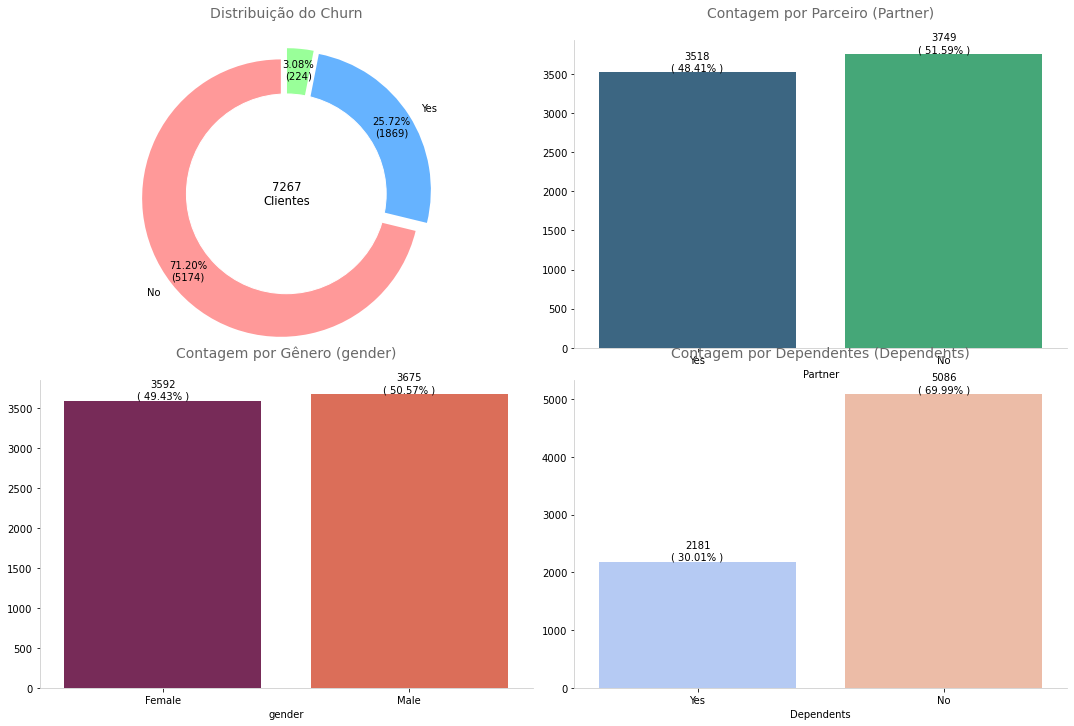

In [18]:
fig = plt.figure(constrained_layout=True, figsize=(15, 10))
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[0, 1])
ax4 = fig.add_subplot(gs[1, 1])

# Grafico 1
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
label_names = df_spams['Churn'].value_counts().index
pie_plot(df_spams, col='Churn', ax=ax1, label_names=label_names, colors=colors,
           title='Distribuição do Churn', text=f'{len(df_spams)}\nClientes')

# Grafico 2
bar_count_plot(df_spams, 
               x='gender', 
               ax=ax2, 
               title='Contagem por Gênero (gender)',
               palette='rocket')

# Grafico 3
bar_count_plot(df_spams, 
               x='Partner', 
               ax=ax3, 
               title='Contagem por Parceiro (Partner)',
               palette='viridis')

# Grafico 3
bar_count_plot(df_spams, 
               x='Dependents', 
               ax=ax4, 
               title='Contagem por Dependentes (Dependents)',
               palette='coolwarm')

plt.show()

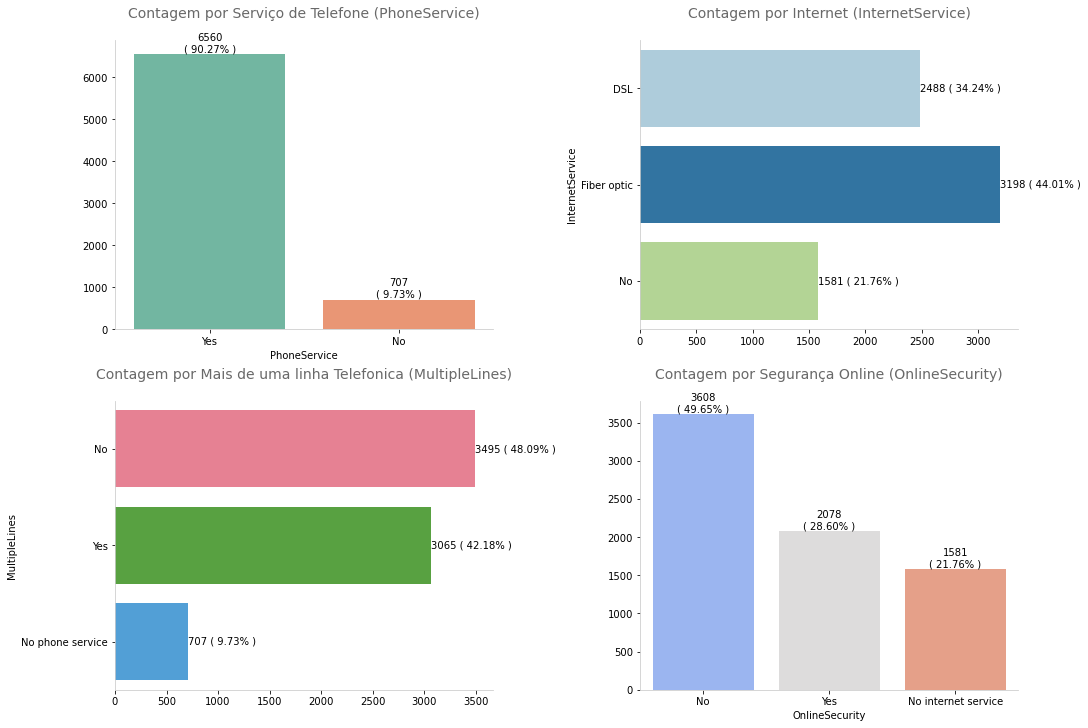

In [19]:
fig = plt.figure(constrained_layout=True, figsize=(15, 10))
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[0, 1])
ax4 = fig.add_subplot(gs[1, 1])

# Grafico 1
bar_count_plot(df_spams, 
               x='PhoneService', 
               ax=ax1, 
               title='Contagem por Serviço de Telefone (PhoneService)',
               palette='Set2')

# Grafico 2
bar_count_plot(df_spams, 
               y='MultipleLines', 
               ax=ax2, 
               title='Contagem por Mais de uma linha Telefonica (MultipleLines)')

# Grafico 3
bar_count_plot(df_spams, 
               y='InternetService', 
               ax=ax3, 
               title='Contagem por Internet (InternetService)',
               palette='Paired')

# Grafico 3
bar_count_plot(df_spams, 
               x='OnlineSecurity', 
               ax=ax4, 
               title='Contagem por Segurança Online (OnlineSecurity)', 
               palette='coolwarm')
plt.show()

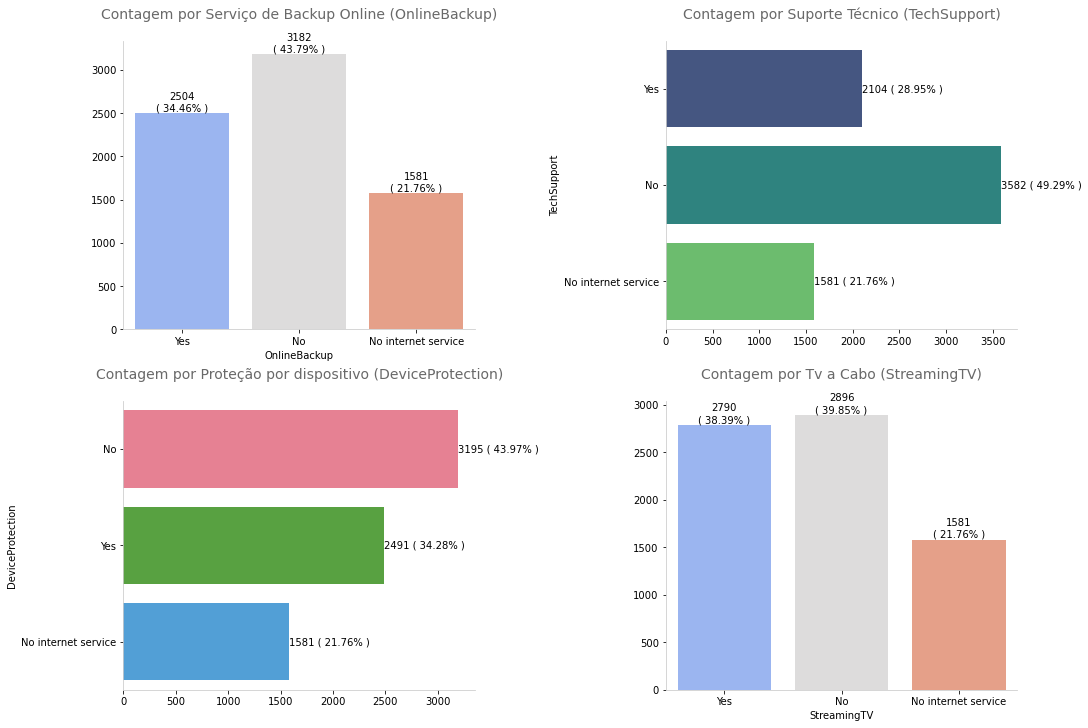

In [20]:
fig = plt.figure(constrained_layout=True, figsize=(15, 10))
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[0, 1])
ax4 = fig.add_subplot(gs[1, 1])

# Grafico 1
bar_count_plot(df_spams, 
               x='OnlineBackup', 
               ax=ax1, 
               title='Contagem por Serviço de Backup Online (OnlineBackup)', 
               palette='coolwarm')

# Grafico 2
bar_count_plot(df_spams, 
               y='DeviceProtection', 
               ax=ax2, 
               title='Contagem por Proteção por dispositivo (DeviceProtection)')


# Grafico 3
bar_count_plot(df_spams, 
               y='TechSupport', 
               ax=ax3, 
               title='Contagem por Suporte Técnico (TechSupport)', 
               palette='viridis')


# Grafico 3
bar_count_plot(df_spams, x='StreamingTV', ax=ax4, title='Contagem por Tv a Cabo (StreamingTV)', palette='coolwarm')


plt.show()

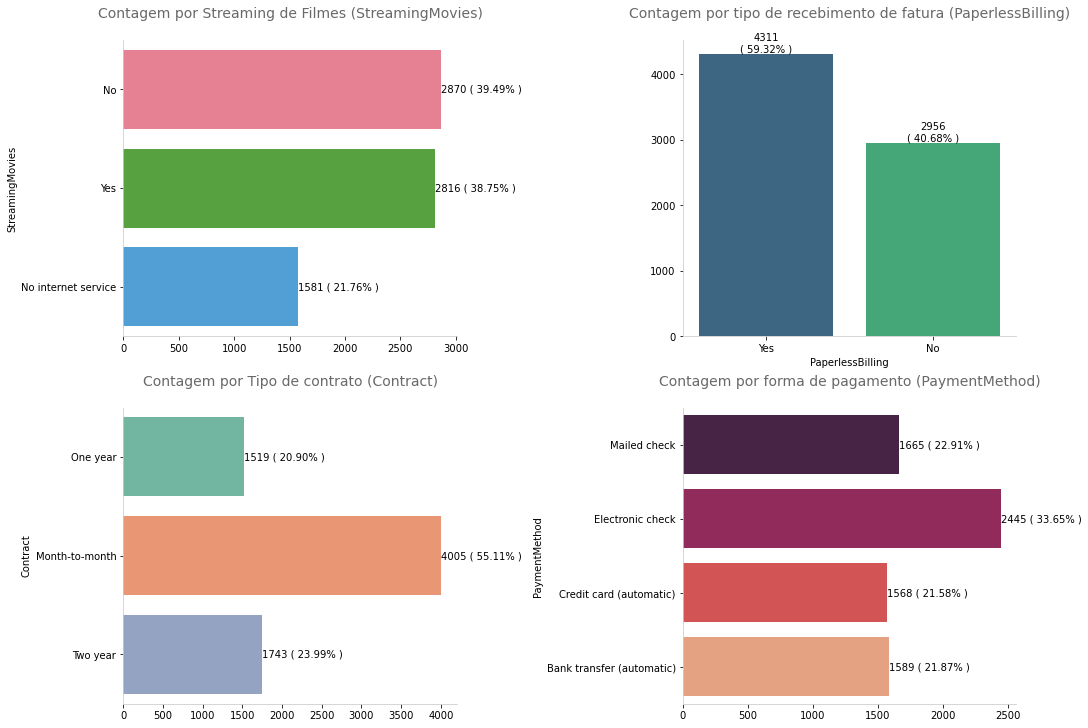

In [21]:
fig = plt.figure(constrained_layout=True, figsize=(15, 10))
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[0, 1])
ax4 = fig.add_subplot(gs[1, 1])

# Grafico 1
bar_count_plot(df_spams, 
               y='StreamingMovies', 
               ax=ax1, 
               title='Contagem por Streaming de Filmes (StreamingMovies)')

# Grafico 2
bar_count_plot(df_spams, 
               y='Contract', 
               ax=ax2, 
               title='Contagem por Tipo de contrato (Contract)',
               palette='Set2')

# Grafico 3
bar_count_plot(df_spams, 
               x='PaperlessBilling', 
               ax=ax3, 
               title='Contagem por tipo de recebimento de fatura (PaperlessBilling)',
               palette='viridis')

# Grafico 3
bar_count_plot(df_spams, 
               y='PaymentMethod', 
               ax=ax4, 
               title='Contagem por forma de pagamento (PaymentMethod)',
               palette='rocket')

plt.show()

Os gráficos nos passam muitos insights, dentre eles:

- Temos 224 registros de churn sem rótulo, não podemos trabalhar com esses dados, portanto __deverão ser removidos__
- Poucos, menos de 10%, não tem serviço de telefonia
- Há cerca de 21% de clientes que não possuem serviço de internet, isso explica um pouco por que há uma quantidade maior de usuários que não tem os demais serviços, muito provavelmente por que são dependentes de internet
- As características __MultipleLines, OnlineSecurity, OnlineBackup, TechSupport, DeviceProtection, StreamingTV e StreamingMovies__ possuem valores que não fazem sentido, considerando que são colunas com cacarteristicas booleanas, isto é, sim ou não. Necessario alterar essa divergencias para algo com sentido, 

In [22]:
# Realizar uma copia do dataframe
df_spams_treated = df_spams.copy()

In [23]:
# Verificando os dados
print(df_spams_treated['Churn'].value_counts())

No     5174
Yes    1869
        224
Name: Churn, dtype: int64


In [24]:
# Removendo colunas com churn em branco
df_spams_treated = df_spams_treated.drop(df_spams_treated[df_spams_treated['Churn'] == ''].index)

Agora serão alterados os demais valores

In [25]:
# Aplicar os ajustes
lst_columns_to_adjust = [
    {"col":"MultipleLines", "old": "No phone service", "new": "No"},
    {"col":"OnlineSecurity","old": "No internet service", "new": "No"},
    {"col":"OnlineBackup","old": "No internet service", "new": "No"},
    {"col":"TechSupport","old": "No internet service", "new": "No"},
    {"col":"DeviceProtection","old": "No internet service", "new": "No"},
    {"col":"StreamingTV","old": "No internet service", "new": "No"},
    {"col":"StreamingMovies","old": "No internet service", "new": "No"}
]

for ele in lst_columns_to_adjust:
    df_spams_treated.loc[df_spams_treated[ele.get('col', '')] == ele.get('old', ''), ele.get('col', '')] = ele.get('new', '')

In [26]:
# Verificar como estào após ajuste
lst = ['MultipleLines', "OnlineSecurity", "OnlineBackup", "TechSupport", "DeviceProtection", "StreamingTV", "StreamingMovies"]
for col in lst:
    print(df_spams_treated[col].value_counts())

No     4072
Yes    2971
Name: MultipleLines, dtype: int64
No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64
No     4614
Yes    2429
Name: OnlineBackup, dtype: int64
No     4999
Yes    2044
Name: TechSupport, dtype: int64
No     4621
Yes    2422
Name: DeviceProtection, dtype: int64
No     4336
Yes    2707
Name: StreamingTV, dtype: int64
No     4311
Yes    2732
Name: StreamingMovies, dtype: int64


<a id="3.4.2"></a>
<font color="dimgrey" size=+1.5><b>3.4.2 Variáveis Numéricas</b></font>

In [27]:
df_spams_treated[['tenure', 'Charges.Monthly', 'Charges.Total']].describe()

,tenure,Charges.Monthly,Charges.Total
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,126054.788528
std,24.559481,30.090047,192437.161756
min,0.000000,18.250000,19.000000
25%,9.000000,35.500000,7544.500000
50%,29.000000,70.350000,36535.000000
75%,55.000000,89.850000,142715.000000
max,72.000000,118.750000,867245.000000


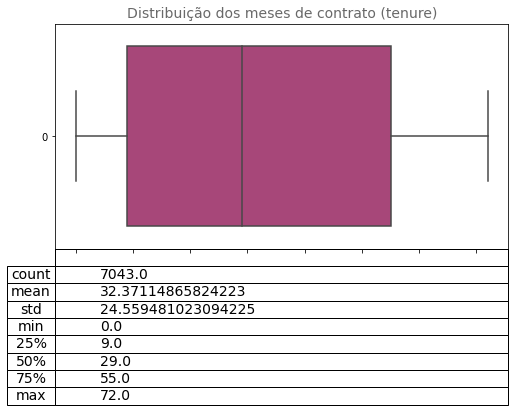

In [28]:
# Chamando a funcao para fazer a plotagem
fig, ax = plt.subplots(figsize=(9, 4))
boxplot(df_spams_treated, 
        p_column='tenure', 
        p_ax=ax, 
        p_title='Distribuição dos meses de contrato (tenure)', 
        p_palette='magma')


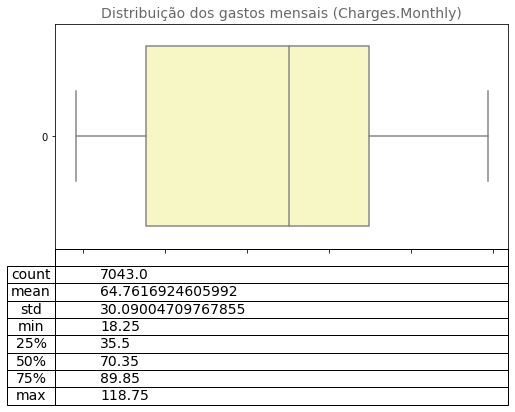

In [29]:
# Chamando a funcao para fazer a plotagem
fig, ax = plt.subplots(figsize=(9, 4))
boxplot(df_spams_treated, 
        p_column='Charges.Monthly', 
        p_ax=ax, 
        p_title='Distribuição dos gastos mensais (Charges.Monthly)', 
        p_palette='Spectral')

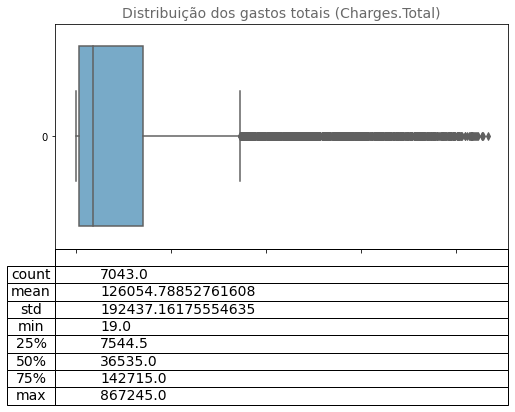

In [30]:
# Chamando a funcao para fazer a plotagem
fig, ax = plt.subplots(figsize=(9, 4))
boxplot(df_spams_treated, 
        p_column='Charges.Total', 
        p_ax=ax, 
        p_title='Distribuição dos gastos totais (Charges.Total)', 
        p_palette='Blues')

Os primeiros insights que podemos ter:

- Há clientes que usam os serviços a menos de 1 mes
- Há clientes que tiveram um gasto total minimo de 19 e um maximo de 867245 (Possivelmente esse campo tem o valor acumulado, para o modelo final talvez fosse interessante não incluí-lo, ou mesmo converter os dados para uma base logaritmica)

Afim de nos dar uma nova visão sobre os dados podemos dividir os gastos mensais por 30, assim teremos uma ideia do quanto é gasto, em média, com os serviços diariamente

In [31]:
df_spams_treated['Charges.Daily'] = df_spams_treated['Charges.Monthly'] /30

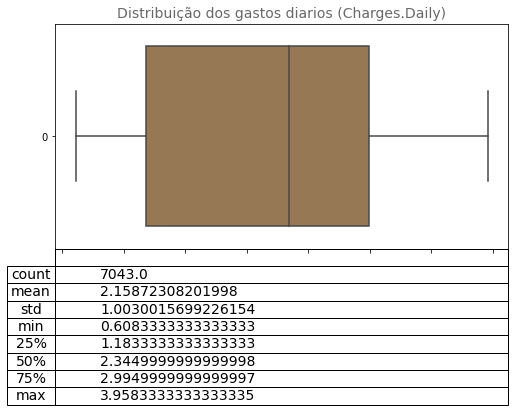

In [32]:
# Chamando a funcao para fazer a plotagem
fig, ax = plt.subplots(figsize=(9, 4))
boxplot(df_spams_treated, 
        p_column='Charges.Daily', 
        p_ax=ax, 
        p_title='Distribuição dos gastos diarios (Charges.Daily)', 
        p_palette='cubehelix')